<a href="https://colab.research.google.com/github/NikhilJ2712/Data-Science/blob/main/Case_Study_2_Bank_Telemarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data using Pandas Function
df = pd.read_csv('bank.csv')
# df = pd.read_csv('bank.csv',sep = ';') # if i want seperate csv file
# It will print Shuffle 100% Dataset
df.sample(frac = 1)
# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4255,42,management,married,secondary,no,1331,no,no,cellular,23,jul,698,2,-1,0,unknown,no
1318,34,technician,married,secondary,no,-346,no,no,cellular,13,aug,136,4,-1,0,unknown,no
2803,37,services,married,secondary,no,1,no,no,unknown,15,may,395,2,-1,0,unknown,no
3195,33,services,married,primary,no,6904,no,no,telephone,20,nov,114,2,-1,0,unknown,no
2530,33,management,single,tertiary,no,0,no,no,cellular,19,aug,53,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4211,27,blue-collar,single,secondary,no,3792,no,no,cellular,22,apr,279,2,-1,0,unknown,yes
770,26,blue-collar,single,secondary,no,-32,yes,yes,cellular,31,jul,14,6,-1,0,unknown,no
2614,32,technician,single,tertiary,no,705,yes,no,cellular,20,apr,20,4,-1,0,unknown,no
2881,42,services,married,tertiary,no,12223,yes,no,cellular,19,nov,36,1,-1,0,unknown,no


In [3]:
# Problem Definition:
'''
This dataset belongs to Portugal Bank Telemarketing.Where our aim is to predict where the client will subscribe to a term deposit or not. Hence 'y' will be act as target Column or dependent column whereas other columns are independent columns.

X = independent columns
y = dependent columns / Target Column

'''
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: >

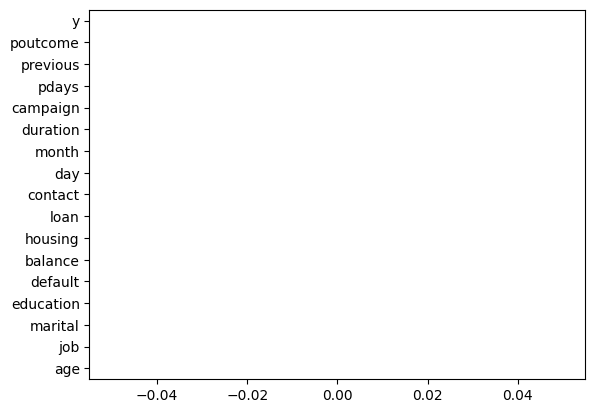

In [4]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
df.isnull().sum().plot(kind = 'barh') # First Method

<Axes: >

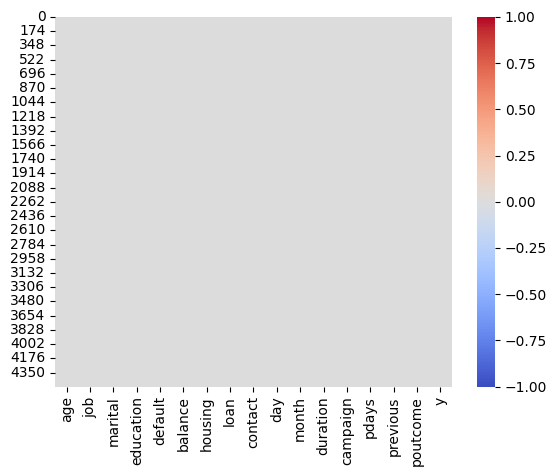

In [5]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
sns.heatmap(df.isnull(),cmap='coolwarm',vmin=-1,vmax=1,center =0)
# Second Method

<Axes: >

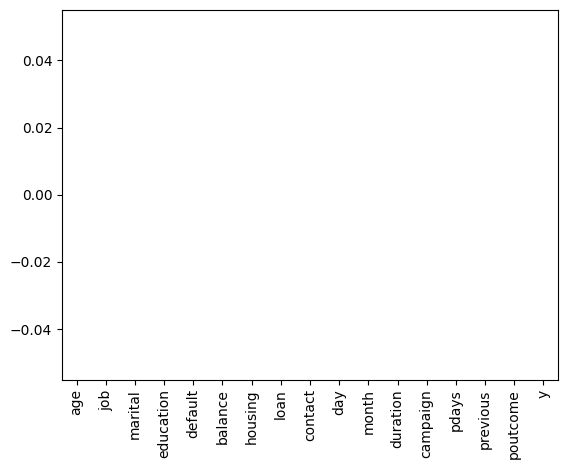

In [6]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
df.isnull().sum().plot(kind = 'bar',cmap = 'viridis') # Third Method

In [7]:
# Split the Dataset Into Categorical and Numerical

categorical_col = df.select_dtypes(include ='object')
categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [8]:
numerical_col = df.select_dtypes(exclude ='object')
numerical_col

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


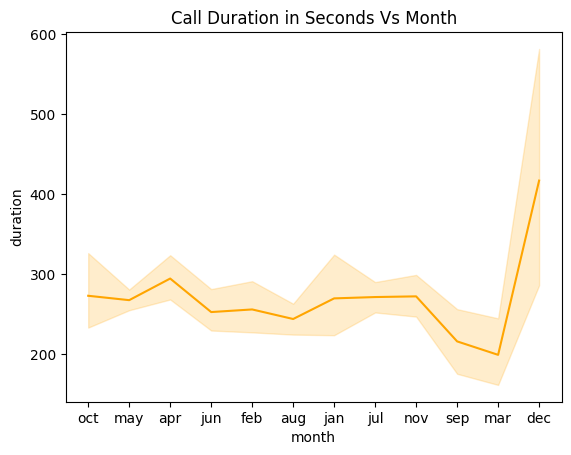

In [10]:
sns.lineplot(x =df['month'], y =df['duration'], c='orange')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

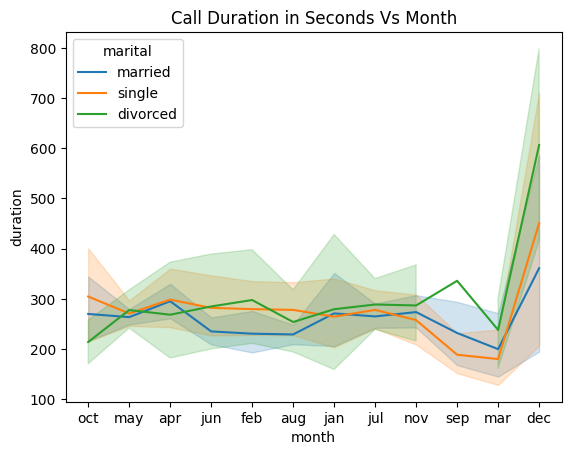

In [11]:
sns.lineplot(x =df['month'], y =df['duration'], c='orange',hue =df['marital'])
plt.title('Call Duration in Seconds Vs Month')
plt.show()

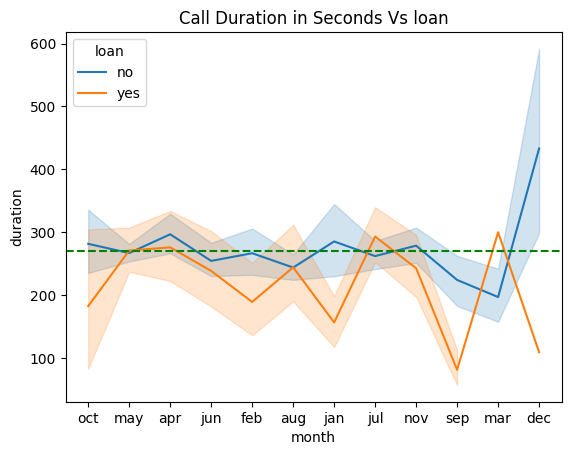

In [12]:
sns.lineplot(x =df['month'], y =df['duration'],hue =df['loan'])
plt.title('Call Duration in Seconds Vs loan')
plt.axhline(270,linestyle ='--', c='green')
plt.show()

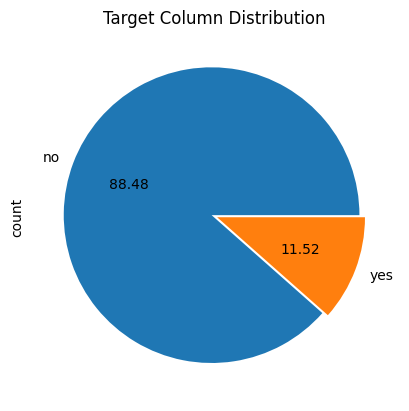

In [13]:
df['y'].value_counts().plot(kind ='pie',autopct = '%1.2f',explode =[0.02,0.02])
plt.title('Target Column Distribution')
plt.show()

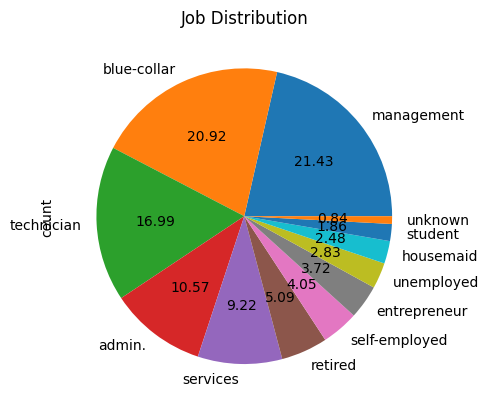

In [14]:
df['job'].value_counts().plot(kind ='pie',autopct = '%1.2f')
plt.title('Job Distribution')
plt.show()

In [15]:
management_job=df[(df['job'] == 'management') & (df['y'] == 'yes')]

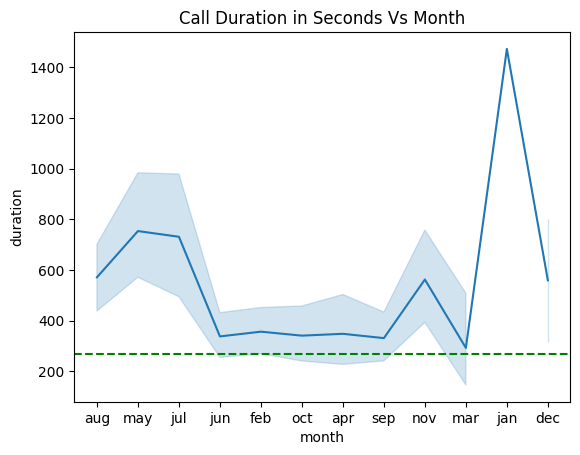

In [16]:
sns.lineplot(x =management_job['month'], y =management_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [17]:
bluecoller_job= df[(df['job'] == 'blue-collar') & (df['y'] == 'yes')]

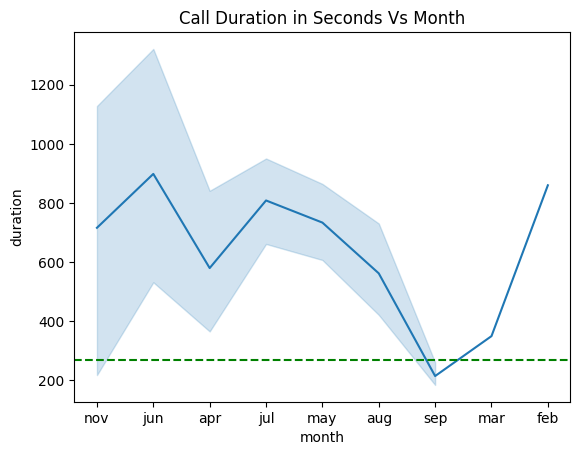

In [18]:
sns.lineplot(x =bluecoller_job['month'], y =bluecoller_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [19]:
technician_job= df[(df['job'] == 'technician') & (df['y'] == 'yes')]

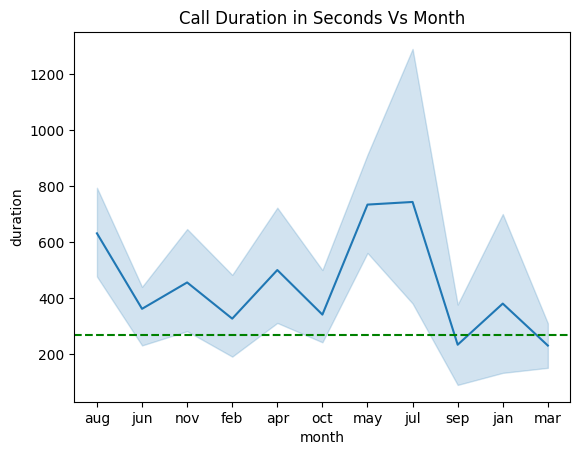

In [20]:
sns.lineplot(x =technician_job['month'], y =technician_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [21]:
admin_job= df[(df['job'] == 'admin') & (df['y'] == 'yes')]

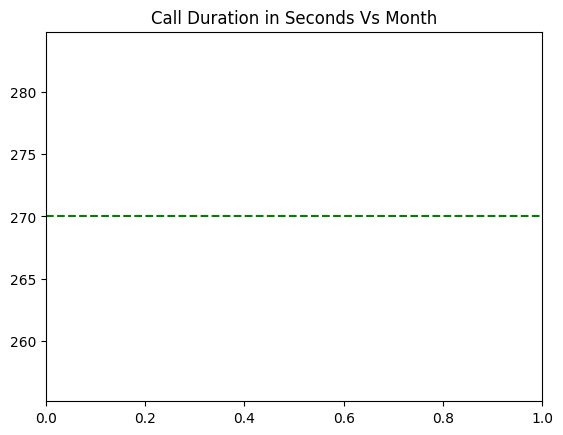

In [22]:
sns.lineplot(x =admin_job['month'], y =admin_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [23]:
services_job= df[(df['job'] == 'services') & (df['y'] == 'yes')]

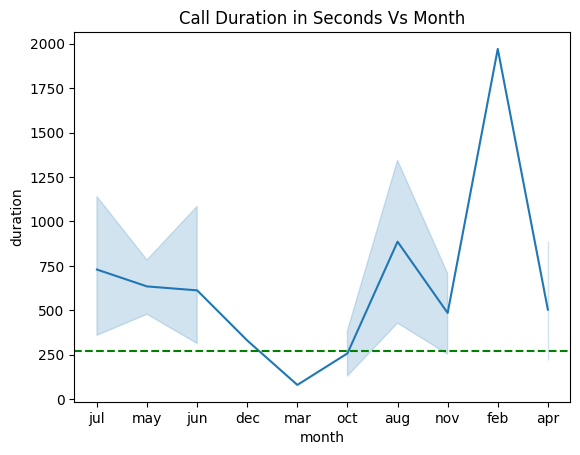

In [24]:
sns.lineplot(x =services_job['month'], y =services_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [25]:
df[df['job'] == 'admin.'].agg(['mode'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode
0,34.0,admin.,married,secondary,no,0.0,yes,no,cellular,20.0,may,77,1.0,-1.0,0.0,unknown,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN


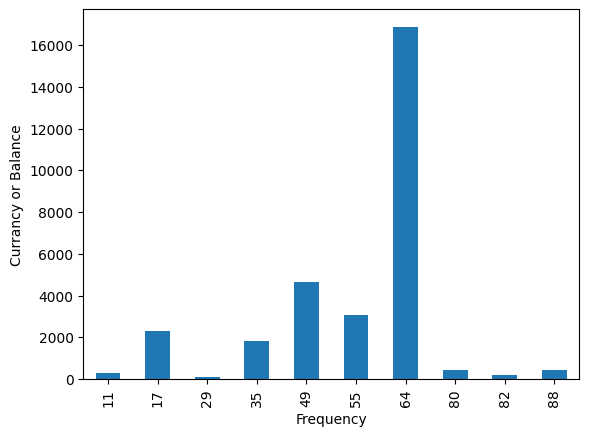

In [26]:
df[df['job'] == 'admin.'] ['balance'][:10].plot(kind = 'bar') # First Method
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

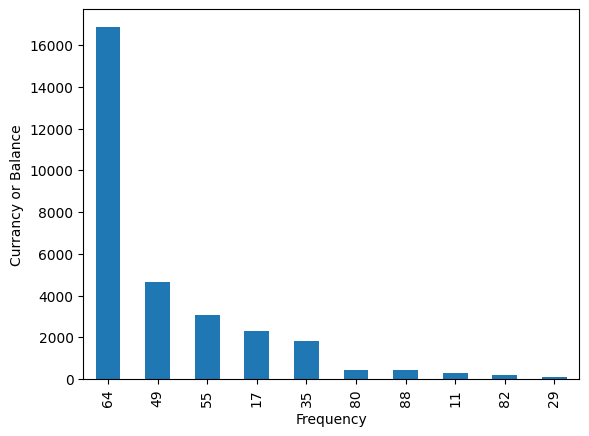

In [27]:
df[df['job'] == 'admin.'] ['balance'][:10].sort_values(ascending= False).plot(kind = 'bar') # Second Method
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

In [28]:
divorced=df[(df['marital'] == 'divorced') & (df['y'] == 'yes')]

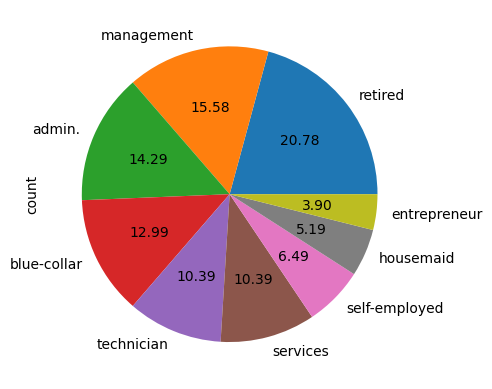

In [29]:
divorced['job'].value_counts().plot(kind ='pie',autopct = '%1.2f')

plt.show()

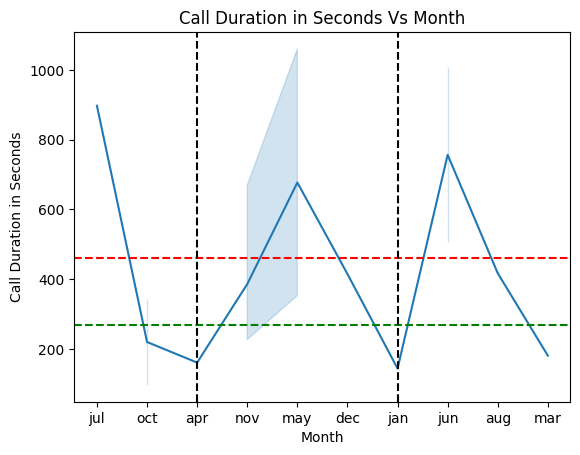

In [30]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

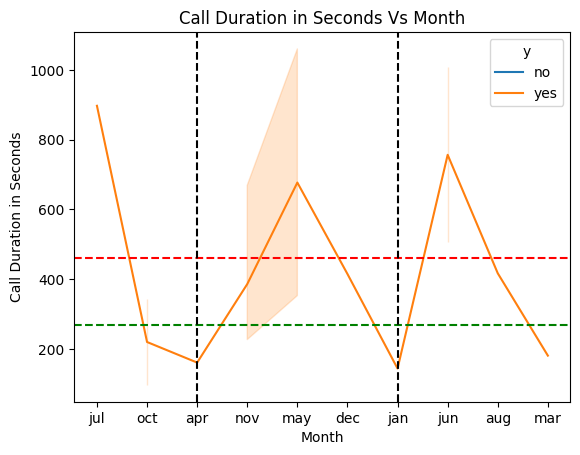

In [31]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'],hue=df['y'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [32]:
divorced=df[(df['marital'] == 'divorced') & (df['y'] == 'no')]

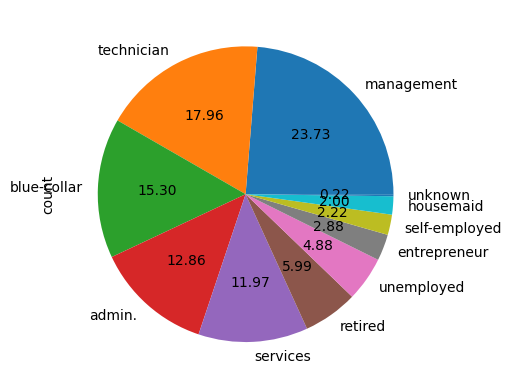

In [33]:
divorced['job'].value_counts().plot(kind ='pie',autopct = '%1.2f')

plt.show()

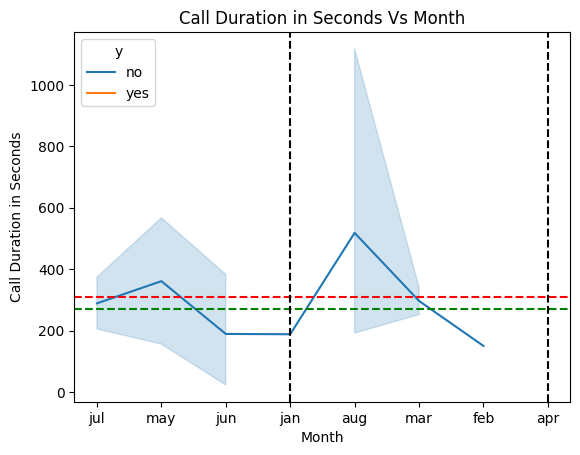

In [34]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'],hue=df['y'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [40]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [39]:
# Univariate Analysis
'''
Step 1 : Create a Blank List
Step 2 : Create a Dictionary
Step 3 : Append list containing Dictionary key and value pair
Step 4 : Convert List into Dataframe

'''


'''
'''
Note :
If any Column in Dataset shows IQR as Zero such column must be dropped from the Dataset.
'''
from collections import OrderedDict
import pandas as pd

stats = []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
     'Feature': i,
      'Count':df[i].count(),
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
      'Standard Deviation':df[i].std(),
      'Kurtosis':df[i].kurt(),
      'Skewness':df[i].skew(),
      'Range':df[i].max()-df[i].min(),
      'Variance':df[i].var()


  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report


,Feature,Count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness,Range,Variance
0,age,4521,19,87,41.170095,39.0,33.0,49.0,16.0,10.576211,0.348775,0.699501,68,1.118562e+02
1,balance,4521,-3313,71188,1422.657819,444.0,69.0,1480.0,1411.0,3009.638142,88.390332,6.596431,74501,9.057922e+06
2,day,4521,1,31,15.915284,16.0,9.0,21.0,12.0,8.247667,-1.039531,0.094627,30,6.802402e+01
3,duration,4521,4,3025,263.961292,185.0,104.0,329.0,225.0,259.856633,12.530050,2.772420,3021,6.752547e+04
4,campaign,4521,1,50,2.793630,2.0,1.0,3.0,2.0,3.109807,37.168920,4.743914,49,9.670897e+00
5,pdays,4521,-1,871,39.766645,-1.0,-1.0,-1.0,0.0,100.121124,7.957128,2.717071,872,1.002424e+04
6,previous,4521,0,25,0.542579,0.0,0.0,0.0,0.0,1.693562,51.995212,5.875259,25,2.868153e+00


In [52]:
# Encoding Technique
'''
Step 1 : Converting Categorical Columns to Numerical Columns
Step 2 : Use Label Encoder or One Hot Encoder

'''
# Create Copy of dataframe : df    # One Hot Encoder Method
data = df.copy()

data = pd.get_dummies(data,drop_first=True,dtype='int')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['job'].value_counts()

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,7,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,4,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,4,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,6,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,9,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,1,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

# Encoding Target Column Separately
df['y'] = df['y'].replace({'yes':1,'no':0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [53]:
df.drop(columns=['pdays','previous'],axis = 1,inplace= True)

In [54]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,1,0


In [55]:
df['y'].value_counts()

,count
y,
0,4000
1,521


In [57]:
# 1. Understand Scaling Technqiue
# 2. Data leackage and how to prevent the same (imp for interview purpose)
# 3. How to balance target column : Three Stratergies